# MCMC: Hamiltonian sampling

Florent Leclercq,<br/>
Institute of Cosmology and Gravitation, University of Portsmouth,<br/>
florent.leclercq@polytechnique.org

In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
from cycler import cycler
%matplotlib inline

## The target pdf

In [2]:
def target_joint(x,y):
    return x*x * np.exp(-x*y*y -y*y +2.*y -4.*x)
def target_marginal_x(x):
    return x*x/np.sqrt(x+1) * np.exp(-4.*x -1./(x+1.))
def target_marginal_y(y):
    return np.exp(-y*y+2.*y) / (y*y+4.)**3
def psi_scalar(x,y):
    # psi(x,y)=-ln(target_joint(x,y))
    if x>0.:
        return -2.*np.log(x) +x*y*y +y*y -2.*y +4.*x
    else:
        return +1e8
psi=np.vectorize(psi_scalar)
def dpsi_dx_scalar(x,y):
    if x>0.:
        return -2./x +y*y* +4.
    else:
        return -1e8
dpsi_dx=np.vectorize(dpsi_dx_scalar)
def dpsi_dy_scalar(x,y):
    return 2.*x*y +2.*y -2.
dpsi_dy=np.vectorize(dpsi_dy_scalar)

In [3]:
# Normalization of the marginals
Nx=quad(target_marginal_x,0.0001,100.)[0]
Ny=quad(target_marginal_y,-100.,100.)[0]

In [4]:
xmin=0.01
xmax=2.
ymin=-1.
ymax=2.5
x=np.linspace(xmin,xmax,1000)
y=np.linspace(ymin,ymax,1000)
X,Y=np.meshgrid(x,y)
Z=target_joint(X,Y)
Psi=psi(X,Y)
dPsi_dx=dpsi_dx(X,Y)
dPsi_dy=dpsi_dy(X,Y)

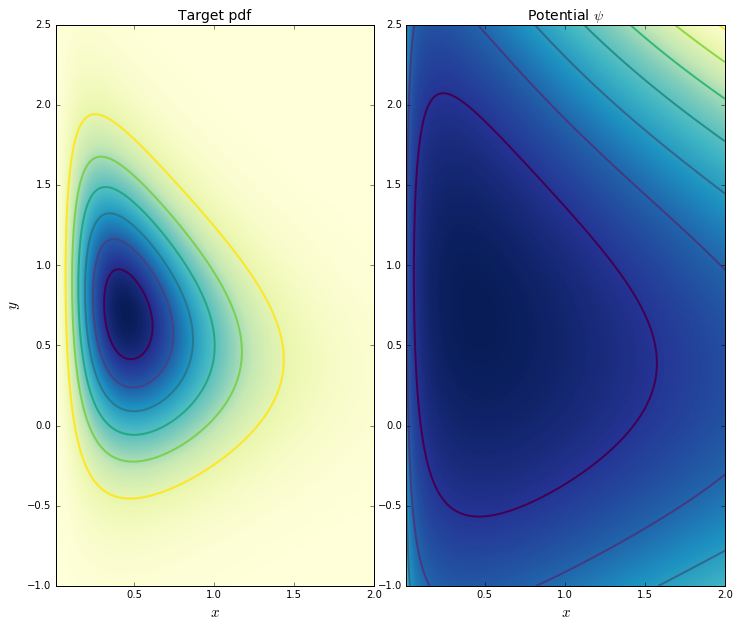

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
f.subplots_adjust(wspace=0.1)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel("$x$",size=15)
ax1.set_ylabel("$y$",size=15)
ax1.imshow(Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu')
ax1.contour(X,Y,Z,extent=(xmin,xmax,ymin,ymax),origin='lower',linewidths=2,cmap='viridis_r')
ax1.set_title("Target pdf",size=14)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.set_xlabel("$x$",size=15)
ax2.imshow(Psi,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu_r')
ax2.contour(X,Y,Psi,extent=(xmin,xmax,ymin,ymax),origin='lower',linewidths=2,cmap='viridis')
ax2.set_title("Potential $\psi$",size=14)
plt.show()

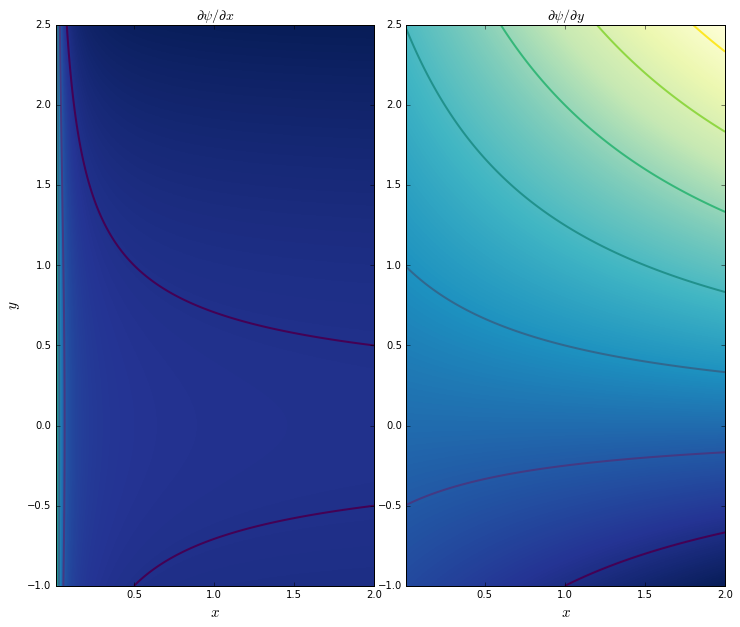

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
f.subplots_adjust(wspace=0.1)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel("$x$",size=15)
ax1.set_ylabel("$y$",size=15)
ax1.imshow(dPsi_dx,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu')
ax1.contour(X,Y,dPsi_dx,extent=(xmin,xmax,ymin,ymax),origin='lower',linewidths=2,cmap='viridis_r')
ax1.set_title("$\partial \psi / \partial x$",size=14)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.set_xlabel("$x$",size=15)
ax2.imshow(dPsi_dy,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu_r')
ax2.contour(X,Y,dPsi_dy,extent=(xmin,xmax,ymin,ymax),origin='lower',linewidths=2,cmap='viridis')
ax2.set_title("$\partial \psi / \partial y$",size=14)
plt.show()

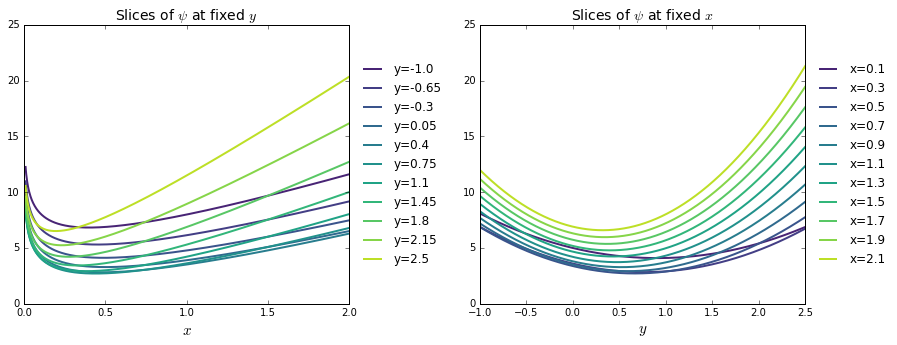

In [7]:
# Plot slices of psi
plt.rc('axes', prop_cycle=(cycler('color', [plt.cm.viridis(i) for i in np.linspace(0.1,0.9,11)])))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
f.subplots_adjust(wspace=0.4)
for this_y in np.linspace(-1,2.5,11):
    ax1.plot(x,psi(x,this_y),label='y='+str(this_y),linewidth=2.)
ax1.set_xlabel("$x$",size=15)
ax1.set_title("Slices of $\psi$ at fixed $y$",size=14)
ax1.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
for this_x in np.linspace(0.1,2.1,11):
    ax2.plot(y,psi(this_x,y),label='x='+str(this_x),linewidth=2.)
ax2.set_xlabel("$y$",size=15)
ax2.set_title("Slices of $\psi$ at fixed $x$",size=14)
ax2.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

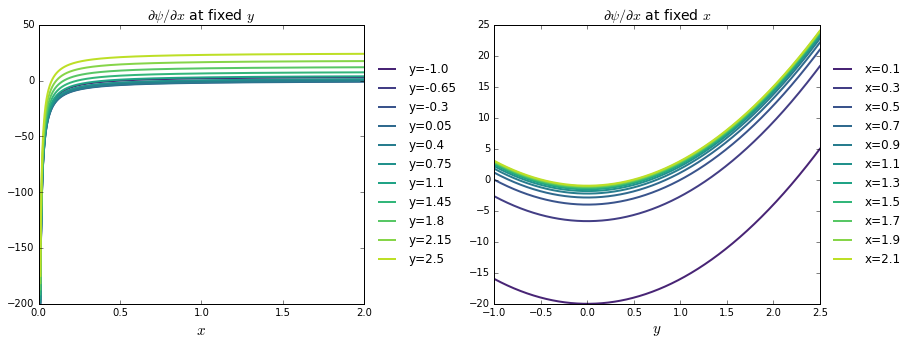

In [8]:
# Plot slices of dpsi/dx
plt.rc('axes', prop_cycle=(cycler('color', [plt.cm.viridis(i) for i in np.linspace(0.1,0.9,11)])))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
f.subplots_adjust(wspace=0.4)
for this_y in np.linspace(-1,2.5,11):
    ax1.plot(x,dpsi_dx(x,this_y),label='y='+str(this_y),linewidth=2.)
ax1.set_xlabel("$x$",size=15)
ax1.set_title("$\partial \psi /\partial x$ at fixed $y$",size=14)
ax1.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
for this_x in np.linspace(0.1,2.1,11):
    ax2.plot(y,dpsi_dx(this_x,y),label='x='+str(this_x),linewidth=2.)
ax2.set_xlabel("$y$",size=15)
ax2.set_title("$\partial \psi /\partial x$ at fixed $x$",size=14)
ax2.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

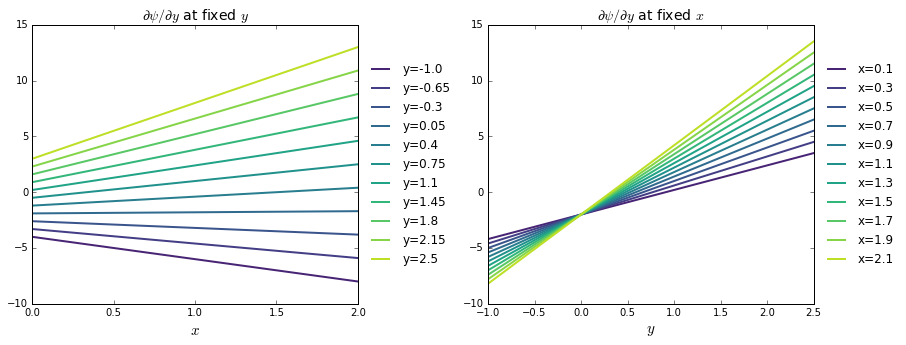

In [9]:
# Plot slices of dpsi/dy
plt.rc('axes', prop_cycle=(cycler('color', [plt.cm.viridis(i) for i in np.linspace(0.1,0.9,11)])))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
f.subplots_adjust(wspace=0.4)
for this_y in np.linspace(-1,2.5,11):
    ax1.plot(x,dpsi_dy(x,this_y),label='y='+str(this_y),linewidth=2.)
ax1.set_xlabel("$x$",size=15)
ax1.set_title("$\partial \psi /\partial y$ at fixed $y$",size=14)
ax1.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
for this_x in np.linspace(0.1,2.1,11):
    ax2.plot(y,dpsi_dy(this_x,y),label='x='+str(this_x),linewidth=2.)
ax2.set_xlabel("$y$",size=15)
ax2.set_title("$\partial \psi /\partial y$ at fixed $x$",size=14)
ax2.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

## Hamiltonian sampling

In [10]:
def Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd,Ntries,x_start,y_start):
    Naccepted=0
    x=x_start
    y=y_start
    samples_x=np.zeros(Ntries+1)
    samples_x[0]=x
    samples_y=np.zeros(Ntries+1)
    samples_y[0]=y
    for i in xrange(Ntries):
        # compute potential energy and gradient
        old_x = x
        old_y = y
        old_psi = psi(old_x,old_y)
        dpsidx = dpsi_dx_scalar(old_x,old_y)
        dpsidy = dpsi_dy_scalar(old_x,old_y)
        
        # randomly draw momenta
        p_x = norm(0.,1.).rvs()
        p_y = norm(0.,1.).rvs()
        p = np.array((p_x,p_y))
        
        # compute kinetic energy
        old_K = p.T.dot(MassMatrix).dot(p)/2.
        
        # compute Hamiltonian
        old_H = old_K + old_psi
        
        # do 3 leapfrog step
        for tau in range(3):
            # draw stepsize
            stepsize = norm(0.,stepstd).rvs()
            
            # Kick: make half step in p_x, p_y
            p_x -= stepsize*dpsidx/2.0
            p_y -= stepsize*dpsidy/2.0
            # Drift: make full step in (x,y)
            new_x = old_x+stepsize*p_x
            new_y = old_y+stepsize*p_y
            # compute new gradient
            dpsidx = dpsi_dx_scalar(new_x,new_y)
            dpsidy = dpsi_dy_scalar(new_x,new_y)
            # Kick: make half step in p_x, p_y
            p_x -= stepsize*dpsidx/2.0
            p_y -= stepsize*dpsidy/2.0
            p = np.array((p_x,p_y))
        
        # compute new energy and Hamiltonian
        new_psi = psi(new_x,new_y)
        new_K = p.T.dot(MassMatrix).dot(p)/2.
        new_H = new_K + new_psi
        dH = new_H - old_H
        
        # accept/reject new candidate x,y using the standard Monte Carlo rule
        if(x<0.):
            accept=False
        else:
            if(dH<0.0):
                accept=True
            else:
                a = np.exp(-dH)
                u = np.random.uniform()
                if(u < a):
                    accept=True
                else:
                    accept=False
                    
        if(accept):
            samples_x[i+1]=x=new_x
            samples_y[i+1]=y=new_y
            Naccepted+=1
        else:
            samples_x[i+1]=x=old_x
            samples_y[i+1]=y=old_y

    return Naccepted, samples_x, samples_y

In [11]:
Ntries=3000
x_start=1.8
y_start=-0.8
MassMatrix=np.array([[1., 0.], [0., 1.]])
stepstd=0.1
Naccepted,samples_x,samples_y=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd,Ntries,x_start,y_start)

In [12]:
fraction_accepted=float(Naccepted)/Ntries
fraction_accepted

0.8243333333333334

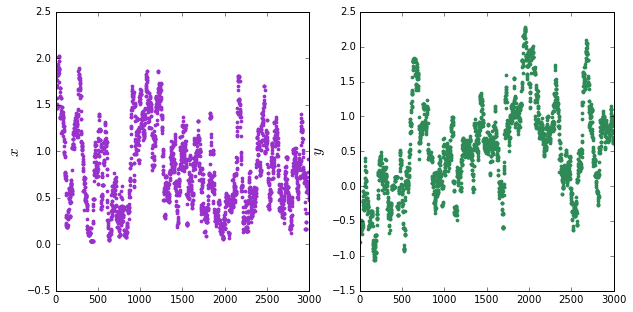

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_xlim(0,Ntries)
ax1.set_ylabel("$x$",size=15)
ax1.scatter(np.arange(Ntries+1),samples_x,color='darkorchid',marker='.',linewidth=1.5)
ax2.set_xlim(0,Ntries)
ax2.set_ylabel("$y$",size=15)
ax2.scatter(np.arange(Ntries+1),samples_y,color='seagreen',marker='.',linewidth=1.5)
plt.show()

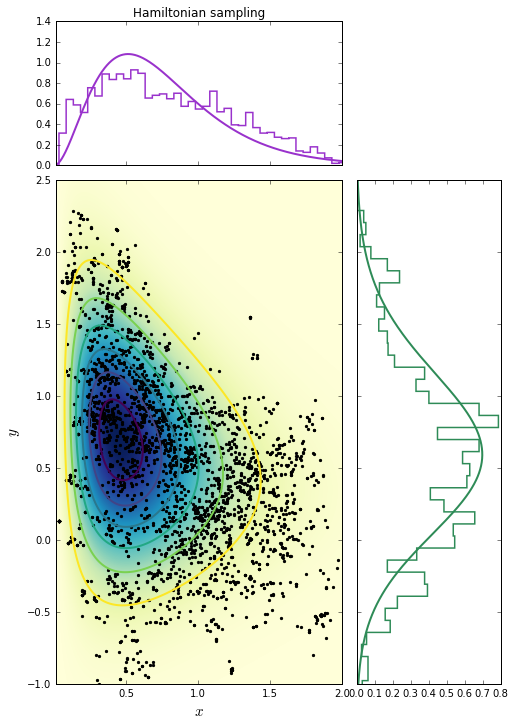

In [14]:
nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0., xmax-xmin
bottom, height = 0., ymax-ymin
left_h = left + width + 0.1
bottom_h = bottom + height + 0.1

rect_pdf = [left, bottom, width, height]
rect_pdfx = [left, bottom_h, width, 1.]
rect_pdfy = [left_h, bottom, 1., height]

# start with a rectangular Figure
plt.figure(1, figsize=(2, 2))

ax = plt.axes(rect_pdf)
axpdfx = plt.axes(rect_pdfx)
axpdfy = plt.axes(rect_pdfy)

# no labels
axpdfx.xaxis.set_major_formatter(nullfmt)
axpdfy.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel("$x$",size=15)
ax.set_ylabel("$y$",size=15)
ax.imshow(Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu')
ax.contour(X,Y,Z,extent=(xmin,xmax,ymin,ymax),origin='lower',linewidths=2,cmap='viridis_r')
ax.scatter(samples_x,samples_y,marker='.',color='black')

axpdfx.set_xlim(xmin,xmax)
axpdfx.set_ylim(0,1.4)
axpdfx.plot(x,target_marginal_x(x)/Nx,linewidth=2.,color='darkorchid')
axpdfx.hist(samples_x,40,normed=True,histtype='step',color='darkorchid',linewidth=1.5)

axpdfy.set_xlim(0,0.8)
axpdfy.set_ylim(ymin,ymax)
axpdfy.plot(target_marginal_y(y)/Ny,y,linewidth=2.,color='seagreen')
axpdfy.hist(samples_y,40,normed=True,histtype='step',color='seagreen',linewidth=1.5,orientation='horizontal')

axpdfx.set_title("Hamiltonian sampling")
plt.show()

## Checking trajectories

In [15]:
Ntries=1000
MassMatrix=np.array([[1., 0.], [0., 1.]])
stepstd=0.03

In [16]:
x_start_1=1.8
y_start_1=-0.8
N1,sx_1,sy_1=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd,Ntries,x_start_1,y_start_1)

In [17]:
x_start_2=1.5
y_start_2=2.0
N2,sx_2,sy_2=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd,Ntries,x_start_2,y_start_2)

In [18]:
x_start_3=0.1
y_start_3=-0.7
N3,sx_3,sy_3=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd,Ntries,x_start_3,y_start_3)

In [19]:
x_start_4=0.2
y_start_4=2.2
N4,sx_4,sy_4=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd,Ntries,x_start_4,y_start_4)

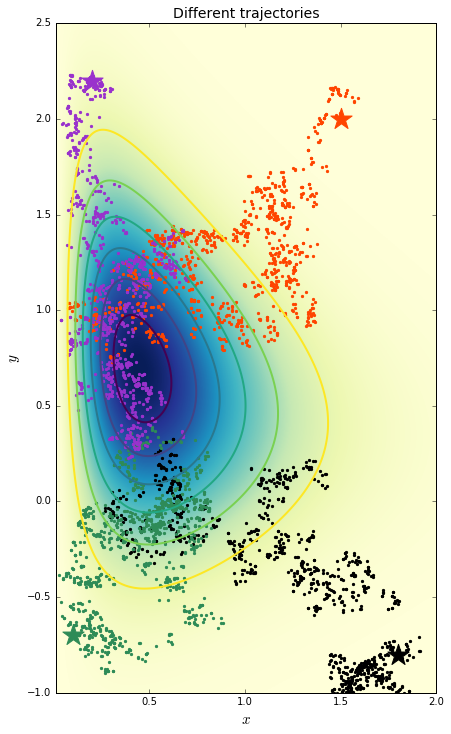

In [20]:
plt.figure(figsize=(12,12))
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.imshow(Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu')
plt.contour(X,Y,Z,extent=(xmin,xmax,ymin,ymax),origin='lower',linewidths=2,cmap='viridis_r')
plt.scatter(x_start_1,y_start_1,s=500,marker='*',color='black')
plt.scatter(sx_1,sy_1,marker='.',color='black')
plt.scatter(x_start_2,y_start_2,s=500,marker='*',color='orangered')
plt.scatter(sx_2,sy_2,marker='.',color='orangered')
plt.scatter(x_start_3,y_start_3,s=500,marker='*',color='seagreen')
plt.scatter(sx_3,sy_3,marker='.',color='seagreen')
plt.scatter(x_start_4,y_start_4,s=500,marker='*',color='darkorchid')
plt.scatter(sx_4,sy_4,marker='.',color='darkorchid')
plt.title("Different trajectories",size=14)
plt.show()

## Tuning the step size

In [21]:
Ntries=1000
x_start=1.8
y_start=-0.8
MassMatrix=np.array([[1., 0.], [0., 1.]])

In [22]:
stepstd_1=0.012
N1,sx_1,sy_1=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd_1,Ntries,x_start,y_start)
fraction_accepted_1=float(N1)/Ntries

In [23]:
stepstd_2=0.1
N2,sx_2,sy_2=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd_2,Ntries,x_start,y_start)
fraction_accepted_2=float(N2)/Ntries

In [24]:
stepstd_3=2.
N3,sx_3,sy_3=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepstd_3,Ntries,x_start,y_start)
fraction_accepted_3=float(N3)/Ntries

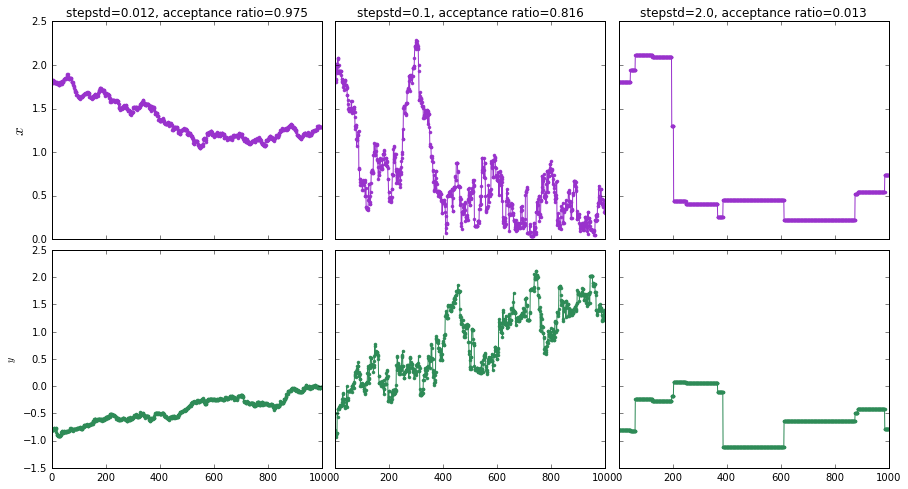

In [25]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15,8))
f.subplots_adjust(wspace=0.05, hspace=0.05)
ax1.set_ylabel("$x$",size=15)
ax1.set_xlim(0,Ntries)
ax1.plot(np.arange(Ntries+1),sx_1,marker='.',color='darkorchid')
ax1.set_title("stepstd="+str(stepstd_1)+", acceptance ratio="+str(fraction_accepted_1))
ax2.set_xlim(0,Ntries)
ax2.plot(np.arange(Ntries+1),sx_2,marker='.',color='darkorchid')
ax2.set_title("stepstd="+str(stepstd_2)+", acceptance ratio="+str(fraction_accepted_2))
ax3.set_xlim(0,Ntries)
ax3.plot(np.arange(Ntries+1),sx_3,marker='.',color='darkorchid')
ax3.set_title("stepstd="+str(stepstd_3)+", acceptance ratio="+str(fraction_accepted_3))
ax4.set_ylabel("$y$")
ax4.plot(np.arange(Ntries+1),sy_1,marker='.',color='seagreen')
ax5.plot(np.arange(Ntries+1),sy_2,marker='.',color='seagreen')
ax6.plot(np.arange(Ntries+1),sy_3,marker='.',color='seagreen')
plt.show()

## Tuning the mass matrix

In [26]:
Ntries=3000
x_start=1.8
y_start=-0.8
stepstd=0.1

In [27]:
MassMatrix_1=np.array([[1., 0.], [0., 1.]])
N1,sx_1,sy_1=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix_1,stepstd,Ntries,x_start,y_start)
fraction_accepted_1=float(N1)/Ntries

In [28]:
MassMatrix_2=np.array([[0.001, 0.], [0., 100.]])
N2,sx_2,sy_2=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix_2,stepstd,Ntries,x_start,y_start)
fraction_accepted_2=float(N2)/Ntries

In [29]:
MassMatrix_3=np.array([[100., 0.], [0., 0.01]])
N3,sx_3,sy_3=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix_3,stepstd,Ntries,x_start,y_start)
fraction_accepted_3=float(N3)/Ntries

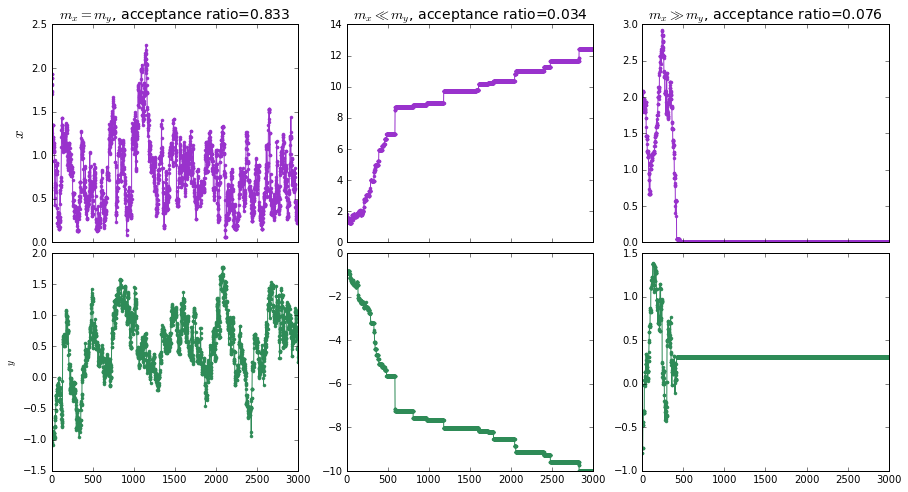

In [30]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', figsize=(15,8))
f.subplots_adjust(wspace=0.2, hspace=0.05)
ax1.set_ylabel("$x$",size=15)
ax1.set_xlim(0,Ntries)
ax1.plot(np.arange(Ntries+1),sx_1,marker='.',color='darkorchid')
ax1.set_title("$m_x=m_y$, acceptance ratio={:.3f}".format(fraction_accepted_1),size=14)
ax2.set_xlim(0,Ntries)
ax2.plot(np.arange(Ntries+1),sx_2,marker='.',color='darkorchid')
ax2.set_title("$m_x \ll m_y$, acceptance ratio={:.3f}".format(fraction_accepted_2),size=14)
ax3.set_xlim(0,Ntries)
ax3.plot(np.arange(Ntries+1),sx_3,marker='.',color='darkorchid')
ax3.set_title("$m_x \gg m_y$, acceptance ratio={:.3f}".format(fraction_accepted_3),size=14)
ax4.set_ylabel("$y$")
ax4.plot(np.arange(Ntries+1),sy_1,marker='.',color='seagreen')
ax5.plot(np.arange(Ntries+1),sy_2,marker='.',color='seagreen')
ax6.plot(np.arange(Ntries+1),sy_3,marker='.',color='seagreen')
plt.show()

In [31]:
MassMatrix_4=np.array([[1e-10, 0.], [0., 1e-10]])
N4,sx_4,sy_4=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix_4,stepstd,Ntries,x_start,y_start)
fraction_accepted_4=float(N4)/Ntries

In [32]:
MassMatrix_5=np.array([[100., 0.], [0., 100.]])
N5,sx_5,sy_5=Hamiltonian_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix_5,stepstd,Ntries,x_start,y_start)
fraction_accepted_5=float(N5)/Ntries

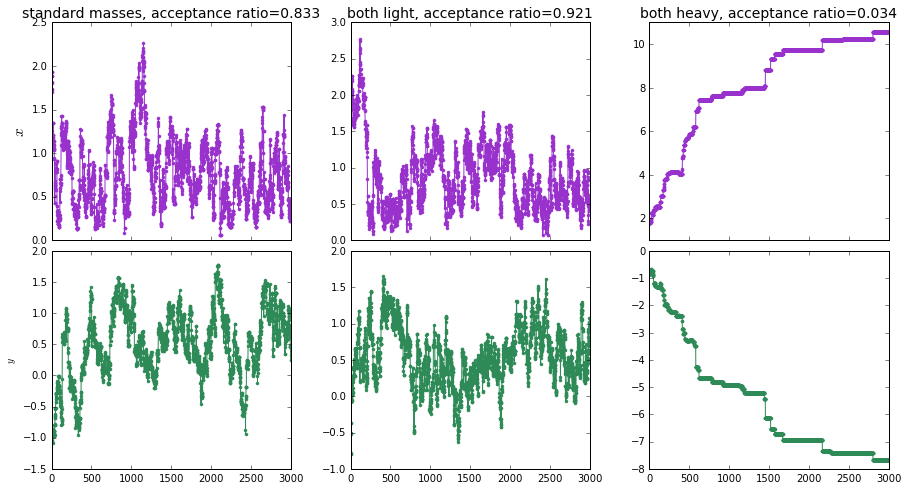

In [33]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', figsize=(15,8))
f.subplots_adjust(wspace=0.25, hspace=0.05)
ax1.set_ylabel("$x$",size=15)
ax1.set_xlim(0,Ntries)
ax1.plot(np.arange(Ntries+1),sx_1,marker='.',color='darkorchid')
ax1.set_title("standard masses, acceptance ratio={:.3f}".format(fraction_accepted_1),size=14)
ax2.set_xlim(0,Ntries)
ax2.plot(np.arange(Ntries+1),sx_4,marker='.',color='darkorchid')
ax2.set_title("both light, acceptance ratio={:.3f}".format(fraction_accepted_4),size=14)
ax3.set_xlim(0,Ntries)
ax3.plot(np.arange(Ntries+1),sx_5,marker='.',color='darkorchid')
ax3.set_title("both heavy, acceptance ratio={:.3f}".format(fraction_accepted_5),size=14)
ax4.set_ylabel("$y$")
ax4.plot(np.arange(Ntries+1),sy_1,marker='.',color='seagreen')
ax5.plot(np.arange(Ntries+1),sy_4,marker='.',color='seagreen')
ax6.plot(np.arange(Ntries+1),sy_5,marker='.',color='seagreen')
plt.show()